### Import Essential Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

### Import DataSet


In [3]:
creditcardData=pd.read_csv("credit-approval_csv.csv")
creditcardData.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [4]:
creditcardData["Approved_Status"].unique()

array(['Approved', 'Not Approved'], dtype=object)

In [5]:
creditcardData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           678 non-null    object 
 1   Age              678 non-null    float64
 2   Debt             690 non-null    float64
 3   Married          684 non-null    object 
 4   BankCustomer     684 non-null    object 
 5   EducationLevel   681 non-null    object 
 6   Ethnicity        681 non-null    object 
 7   YearsEmployed    690 non-null    float64
 8   PriorDefault     690 non-null    object 
 9   Employed         690 non-null    object 
 10  CreditScore      690 non-null    int64  
 11  DriversLicense   690 non-null    object 
 12  Citizen          690 non-null    object 
 13  ZipCode          677 non-null    float64
 14  Income           690 non-null    int64  
 15  Approved         690 non-null    object 
 16  Approved_Status  690 non-null    object 
dtypes: float64(4), i

#### Observations
1. Approved_Status is the response variable


--- 
2. There are some NULL values in the dataset, we need to explore more on those predictors to decide:
- straight away drop all the NULL values   OR
- fill the NULL values with median or mode

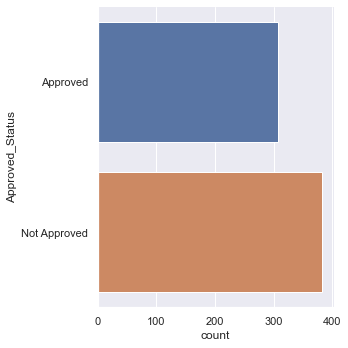

In [6]:
sb.catplot(y="Approved_Status",data=creditcardData,kind="count")

In [7]:
No_notapproved,No_approved=creditcardData["Approved_Status"].value_counts()
print("Ratio of Approved:Not_Approved=",No_approved,":",No_notapproved)
print("Approved percentage: {0:.2f} %".format((No_approved/(No_notapproved+No_approved))*100))

Ratio of Approved:Not_Approved= 307 : 383
Approved percentage: 44.49 %


We see that the percentage of approved credit card is  44.49%, which is slightly less than 50%. We need more information to predict the approval of a credit card, if not its just like a naive guess.

---

### Numeric predictors

In [8]:
creditcardDataInt = creditcardData.loc[:, creditcardData.dtypes == np.int64]
creditcardDataInt.describe()

,CreditScore,Income
count,690.00000,690.000000
mean,2.40000,1017.385507
std,4.86294,5210.102598
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,5.000000
75%,3.00000,395.500000
max,67.00000,100000.000000


In [9]:
creditcardDataFlt = creditcardData.loc[:, creditcardData.dtypes == np.float64]
creditcardDataFlt.describe()

,Age,Debt,YearsEmployed,ZipCode
count,678.000000,690.000000,690.000000,677.000000
mean,31.568171,4.758725,2.223406,184.014771
std,11.957862,4.978163,3.346513,173.806768
min,13.750000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,75.000000
50%,28.460000,2.750000,1.000000,160.000000
75%,38.230000,7.207500,2.625000,276.000000
max,80.250000,28.000000,28.500000,2000.000000


---

### Categorical Predictor

In [10]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


In [11]:
print("Discovering the values of EducationLevel")
creditcardData["EducationLevel"].value_counts()

Discovering the values of EducationLevel


c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
m      38
x      38
d      30
e      25
j      10
r       3
Name: EducationLevel, dtype: int64

In [12]:
print("Discovering the values of Ethnicity")
creditcardData["Ethnicity"].value_counts()

Discovering the values of Ethnicity


v     399
h     138
bb     59
ff     57
j       8
z       8
dd      6
n       4
o       2
Name: Ethnicity, dtype: int64

Variables "EducationLevel" and "Ethnicity" have too many ambiguous value. After checking the dataset source, we knew that most of the people do not want to disclose these info as they are confidential. Therefore, we will drop this variables out of our predictors.


---

In [13]:
todrop=["EducationLevel","Ethnicity"]
ccData=creditcardData.drop(columns=todrop)
ccData.head()

,Gender,Age,Debt,Married,BankCustomer,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,1.71,t,f,0,f,s,120.0,0,+,Approved


In [14]:
ccData.dropna(inplace=True)
ccData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 654 entries, 0 to 689
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           654 non-null    object 
 1   Age              654 non-null    float64
 2   Debt             654 non-null    float64
 3   Married          654 non-null    object 
 4   BankCustomer     654 non-null    object 
 5   YearsEmployed    654 non-null    float64
 6   PriorDefault     654 non-null    object 
 7   Employed         654 non-null    object 
 8   CreditScore      654 non-null    int64  
 9   DriversLicense   654 non-null    object 
 10  Citizen          654 non-null    object 
 11  ZipCode          654 non-null    float64
 12  Income           654 non-null    int64  
 13  Approved         654 non-null    object 
 14  Approved_Status  654 non-null    object 
dtypes: float64(4), int64(2), object(9)
memory usage: 81.8+ KB


In [15]:
print("After dropping all the NULL value in the dataset, {0:.2f}% of data dropped".format(((690-654)/690)*100))

After dropping all the NULL value in the dataset, 5.22% of data dropped


---

<AxesSubplot:xlabel='Age', ylabel='Count'>

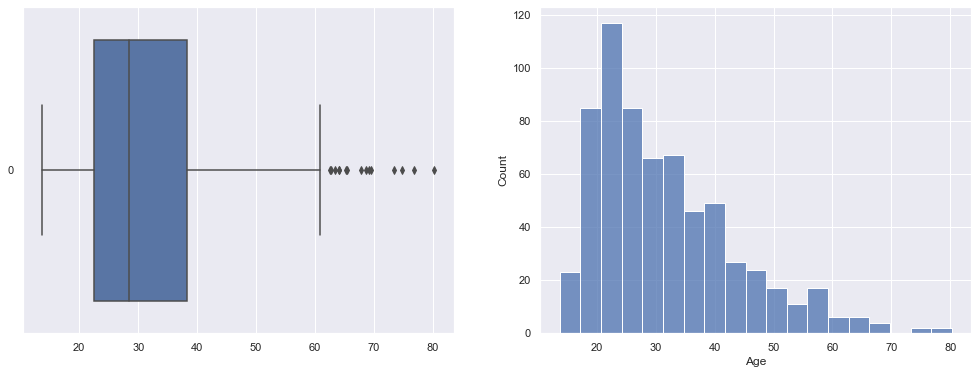

In [16]:
f, axes = plt.subplots(1, 2, figsize=(17, 6))
sb.boxplot(data = ccData['Age'], orient = "h", ax = axes[0])
sb.histplot(data = ccData['Age'], ax = axes[1])

Strip Plot & Swarm Plot for variabe 'Age' 


<AxesSubplot:xlabel='Age', ylabel='Approved_Status'>

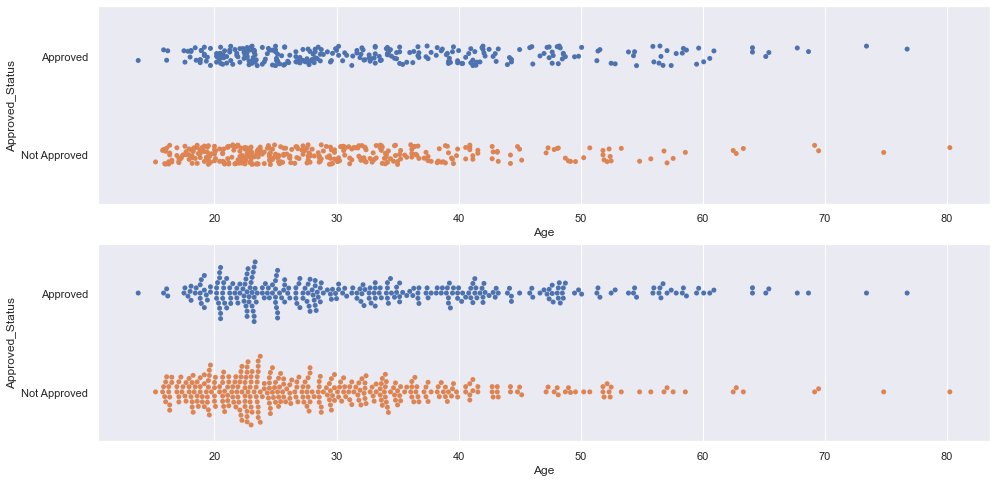

In [17]:
f,axes=plt.subplots(2,1,figsize=(16,8))
print("Strip Plot & Swarm Plot for variabe 'Age' ")
sb.stripplot(x = 'Age', y = 'Approved_Status', data = ccData, ax=axes[0])
sb.swarmplot(data=ccData,x="Age",y="Approved_Status",ax=axes[1])

In [18]:
age_predictor = pd.DataFrame(ccData["Age"])
approve_response = pd.DataFrame(ccData["Approved_Status"])
age_train, age_test, approve_train, approve_test = train_test_split(age_predictor, approve_response, test_size = 0.25)

In [19]:
dectree = DecisionTreeClassifier(max_depth = 9)  # create the decision tree object
dectree.fit(age_train, approve_train)
approve_train_pred = dectree.predict(age_train)
approve_test_pred = dectree.predict(age_test)

[Text(848.7420863309353, 619.7040000000001, 'Age <= 38.96\ngini = 0.497\nsamples = 490\nvalue = [225, 265]\nclass = Yes'),
 Text(493.1676258992806, 554.4720000000001, 'Age <= 20.125\ngini = 0.486\nsamples = 371\nvalue = [154, 217]\nclass = Yes'),
 Text(231.22877697841727, 489.24000000000007, 'Age <= 19.835\ngini = 0.39\nsamples = 64\nvalue = [17, 47]\nclass = Yes'),
 Text(211.95971223021584, 424.00800000000004, 'Age <= 19.625\ngini = 0.41\nsamples = 59\nvalue = [17, 42]\nclass = Yes'),
 Text(192.6906474820144, 358.77600000000007, 'Age <= 19.46\ngini = 0.392\nsamples = 56\nvalue = [15, 41]\nclass = Yes'),
 Text(173.42158273381295, 293.54400000000004, 'Age <= 17.96\ngini = 0.42\nsamples = 50\nvalue = [15, 35]\nclass = Yes'),
 Text(96.3453237410072, 228.31200000000007, 'Age <= 16.21\ngini = 0.33\nsamples = 24\nvalue = [5, 19]\nclass = Yes'),
 Text(57.80719424460432, 163.08000000000004, 'Age <= 16.04\ngini = 0.49\nsamples = 7\nvalue = [3, 4]\nclass = Yes'),
 Text(38.53812949640288, 97.8480

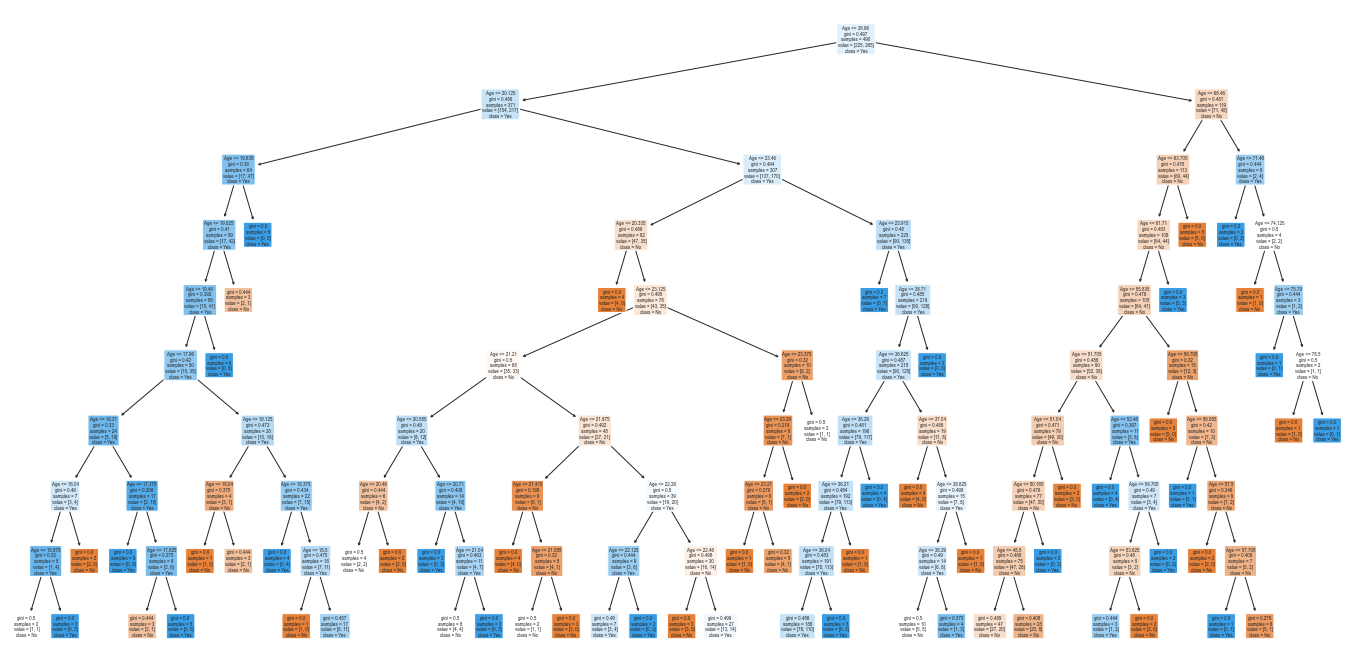

In [20]:
f = plt.figure(figsize=(24,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["Age"], 
          class_names=["No","Yes"])

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6959183673469388

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5853658536585366



<AxesSubplot:>

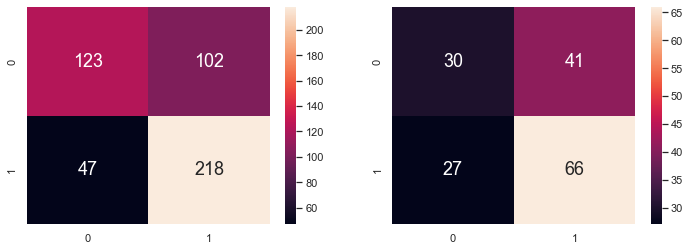

In [21]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(age_train, approve_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(age_test, approve_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(approve_train, approve_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(approve_test, approve_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [22]:
# Import the encoder from sklearn
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

# Combining Numeric features with the OHE Categorical features
creditData_num = creditData[['Debt']]
creditData_res = creditData['Approved_Status']
creditData_ohe = pd.concat([creditData_num, creditData_res], 
                           sort = False, axis = 1).reindex(index=creditData_num.index)

# Check the final dataframe
creditData_ohe.info()

NameError: name 'creditData' is not defined

In [ ]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

# Extract Response and Predictors
y = pd.DataFrame(creditData_ohe['Approved_Status'])
X = pd.DataFrame(creditData_ohe.drop('Approved_Status', axis = 1))

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Approved","Not Approved"])

In [ ]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [ ]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})